# Pike County, KY NFIP Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import os
import us

## Claims

In [2]:
df_claims = pd.read_csv("FIMA_NFIP_Redacted_Claims_Data_Set/openFEMA_claims20190331.csv",
                       low_memory = True)
print(df_claims.shape)
df_claims.head()

C:\Users\zach.goldstein\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,11,15,22,23,31,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2418007, 39)


,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzip,primaryresidence
0,NaN,2019-03-31,NaN,0.0,OCEANSIDE,N,1.0,6073.0,0.0,1998-02-07,...,NaN,N,7,NaN,CA,200000.0,50000.0,1998,92056,NaN
1,NaN,2019-03-31,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,0.0,2005-08-29,...,NaN,N,7,NaN,LA,100000.0,40000.0,2005,70131,Y
2,NaN,2019-03-31,NaN,0.0,NAVARRE,N,1.0,12113.0,0.5,1998-09-28,...,0.0,N,1,NaN,FL,100000.0,50000.0,1998,32566,NaN
3,NaN,2019-03-31,NaN,1.0,BEAUFORT,N,1.0,45013.0,0.0,1994-10-07,...,NaN,N,7,NaN,SC,100000.0,25000.0,1994,29902,NaN
4,NaN,2019-03-31,NaN,0.0,MELBOURNE,N,1.0,12009.0,0.0,1996-03-11,...,NaN,Y,7,NaN,FL,100000.0,25000.0,1996,32940,NaN


In [3]:
df_claims.dtypes

agriculturestructureindicator                  object
asofdate                                       object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                   object
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                     object
elevatedbuildingindicator                      object
elevationcertificateindicator                  object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
houseworship                                   object
latitude                                      float64
locationofcontents                             object
longitude                   

In [4]:
pike_fips = 21195
df_claims_pike = df_claims[df_claims.countycode==pike_fips]
print(df_claims_pike.shape)
df_claims_pike.head()

(2306, 39)


,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzip,primaryresidence
15351,NaN,2019-03-31,NaN,0.0,TURKEY CREEK,N,1.0,21195.0,0.0,1992-03-09,...,NaN,N,1,NaN,KY,28000.0,0.0,1992,41570,NaN
24020,NaN,2019-03-31,671.0,0.0,PIKEVILLE,N,1.0,21195.0,0.5,2009-05-03,...,NaN,Y,1,NaN,KY,204100.0,51000.0,2009,41501,Y
40046,NaN,2019-03-31,NaN,0.0,PIKEVILLE,N,1.0,21195.0,0.5,2009-05-09,...,0.0,N,1,NaN,KY,167500.0,50000.0,2009,41501,Y
103445,NaN,2019-03-31,NaN,0.0,PIKEVILLE,N,1.0,21195.0,0.5,2002-05-02,...,0.0,N,1,NaN,KY,75000.0,100000.0,2002,41501,N
103989,NaN,2019-03-31,NaN,0.0,PIKEVILLE,N,1.0,21195.0,0.5,2009-05-08,...,0.0,N,1,NaN,KY,50000.0,0.0,2009,41501,Y


Compare to rest of country

In [5]:
n_claims_by_county = df_claims.groupby(by = "countycode").size().sort_values(ascending = False)
n_claims_by_county.head()

countycode
48201.0    163185
22051.0    130656
22071.0    124096
48167.0     60530
12086.0     58076
dtype: int64

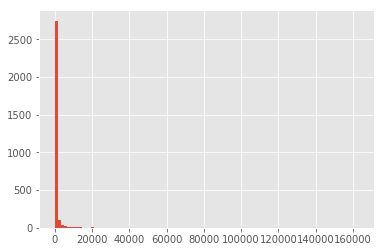

In [6]:
n_claims_by_county.hist(bins = 100)
plt.show()

Compare to rest of state

In [7]:
df_claims_ky = df_claims[df_claims['state']=="KY"]
print(df_claims_ky.shape)
df_claims.head()
#df_claims_ky.to_csv("kentucky_claims.csv")

(24429, 39)


,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzip,primaryresidence
0,NaN,2019-03-31,NaN,0.0,OCEANSIDE,N,1.0,6073.0,0.0,1998-02-07,...,NaN,N,7,NaN,CA,200000.0,50000.0,1998,92056,NaN
1,NaN,2019-03-31,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,0.0,2005-08-29,...,NaN,N,7,NaN,LA,100000.0,40000.0,2005,70131,Y
2,NaN,2019-03-31,NaN,0.0,NAVARRE,N,1.0,12113.0,0.5,1998-09-28,...,0.0,N,1,NaN,FL,100000.0,50000.0,1998,32566,NaN
3,NaN,2019-03-31,NaN,1.0,BEAUFORT,N,1.0,45013.0,0.0,1994-10-07,...,NaN,N,7,NaN,SC,100000.0,25000.0,1994,29902,NaN
4,NaN,2019-03-31,NaN,0.0,MELBOURNE,N,1.0,12009.0,0.0,1996-03-11,...,NaN,Y,7,NaN,FL,100000.0,25000.0,1996,32940,NaN


In [8]:
n_claims_by_county_ky = df_claims_ky.groupby(by = "countycode").size().sort_values(ascending = False)
print(len(n_claims_by_county_ky))
n_claims_by_county_ky.head()

116


countycode
21111.0    5280
21071.0    2355
21195.0    2306
21073.0    1378
21185.0     893
dtype: int64

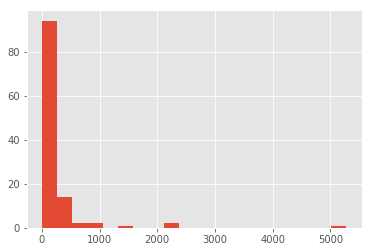

In [9]:
n_claims_by_county_ky.hist(bins = 20)
plt.show()

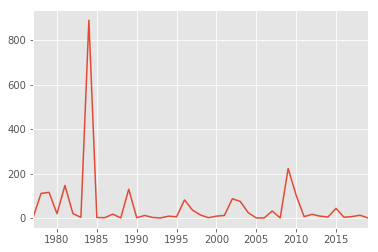

In [10]:
pike_claims_by_year = df_claims_pike.yearofloss.value_counts().sort_index()
pike_claims_by_year.plot()
plt.show()

In [11]:
# Number of claims in Pike County over the past 10 years
print(pike_claims_by_year.tail(11))
pike_claims_by_year.tail(11).sum()

2009    223
2010    103
2011      7
2012     17
2013      9
2014      5
2015     44
2016      4
2017      7
2018     13
2019      1
Name: yearofloss, dtype: int64


433

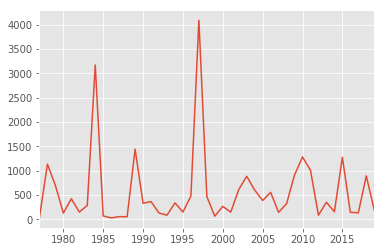

In [12]:
ky_claims_by_year = df_claims_ky.yearofloss.value_counts().sort_index()
ky_claims_by_year.plot()
plt.show()

In [13]:
df_claims_pike.reportedcity.value_counts().head()

PIKEVILLE       668
TOLER           244
BELFRY          170
S WILLIAMSON     99
FREEBURN         75
Name: reportedcity, dtype: int64

In [14]:
n_claims_by_county_ky_decade = df_claims_ky[df_claims_ky['yearofloss']>=2009].groupby(by = "countycode").size().sort_values(ascending = False)
n_claims_by_county_ky_decade.head()

countycode
21111.0    1767
21195.0     433
21071.0     423
21185.0     375
21073.0     233
dtype: int64

## Policies

Kentucky Policies dataset

In [15]:
df_ky_policies = pd.read_csv("kentucky_policies.csv")
print(df_ky_policies.shape)
df_ky_policies.head()

C:\Users\zach.goldstein\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,18,24,26,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(256954, 46)


,Unnamed: 0,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,...,primaryresidenceindicator,propertystate,propertyzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,0,NaN,NaN,2.0,NaN,2.101396e+10,N,N,21013.0,0.0,...,Y,KY,40977,1,R,PINEVILLE,NaN,20000,0,237
1,1,NaN,NaN,0.0,NaN,2.107192e+10,N,N,21071.0,0.0,...,N,KY,41649,1,R,MARTIN,NaN,103700,0,936
2,2,NaN,670.0,0.0,NaN,2.119593e+10,N,N,21195.0,0.5,...,N,KY,41503,1,R,S WILLIAMSON,NaN,70700,0,617
3,3,NaN,448.0,0.0,NaN,2.102902e+10,N,N,21029.0,0.0,...,N,KY,40165,1,R,SHEPHERDSVLLE,NaN,99200,0,250
4,4,NaN,NaN,0.0,NaN,2.101396e+10,N,N,21013.0,0.0,...,N,KY,40965,1,R,MIDDLESBORO,NaN,45000,0,395


In [16]:
pike_fips = 21195
df_policies_pike = df_ky_policies[df_ky_policies.countycode==pike_fips]
print(df_policies_pike.shape)
df_policies_pike.head()

(15305, 46)


,Unnamed: 0,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,...,primaryresidenceindicator,propertystate,propertyzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
2,2,NaN,670.0,0.0,NaN,2.119593e+10,N,N,21195.0,0.5,...,N,KY,41503,1,R,S WILLIAMSON,NaN,70700,0,617
6,6,NaN,NaN,0.0,NaN,2.119593e+10,N,N,21195.0,0.5,...,N,KY,41503,1,R,S WILLIAMSON,NaN,500000,449200,8620
45,45,NaN,NaN,1.0,2012-01-27,2.119593e+10,N,N,21195.0,0.5,...,N,KY,41501,1,R,PIKEVILLE,NaN,500000,318400,5398
96,96,NaN,NaN,0.0,NaN,2.119593e+10,N,N,21195.0,0.5,...,Y,KY,41522,1,R,ELKHORN CITY,NaN,126400,24600,1050
121,121,NaN,933.0,3.0,NaN,2.119593e+10,N,N,21195.0,0.5,...,Y,KY,41522,1,R,ELKHORN CITY,NaN,140800,0,391


Compare to rest of country

In [17]:
n_policies_by_county = df_ky_policies.groupby(by = "countycode").size().sort_values(ascending = False)
n_policies_by_county.head()

countycode
21111.0    55659
21059.0    21273
21195.0    15305
21071.0    12138
21029.0     8579
dtype: int64

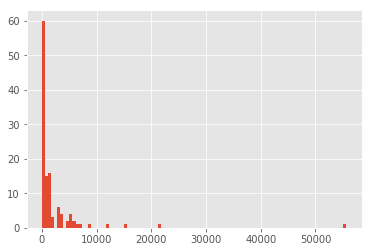

In [18]:
n_policies_by_county.hist(bins = 100)
plt.show()

Compare to rest of state

In [19]:
n_policies_by_county_ky = df_ky_policies.groupby(by = "countycode").size().sort_values(ascending = False)
print(len(n_policies_by_county_ky))
n_policies_by_county_ky.head()

119


countycode
21111.0    55659
21059.0    21273
21195.0    15305
21071.0    12138
21029.0     8579
dtype: int64

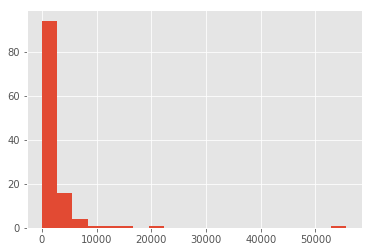

In [20]:
n_policies_by_county_ky.hist(bins = 20)
plt.show()

In [21]:
len(df_policies_pike)

15305

In [22]:
df_ky_policies.columns

Index(['Unnamed: 0', 'agriculturestructureindicator', 'basefloodelevation',
       'basementenclosurecrawlspacetype', 'cancellationdateoffloodpolicy',
       'censustract', 'condominiumindicator', 'construction', 'countycode',
       'crsdiscount', 'deductibleamountinbuildingcoverage',
       'deductibleamountincontentscoverage', 'elevatedbuildingindicator',
       'elevationcertificateindicator', 'elevationdifference',
       'federalpolicyfee', 'floodzone', 'hfiaa_sur', 'houseofworshipindicator',
       'latitude', 'locationofcontents', 'longitude', 'lowestadjacentgrade',
       'lowestfloorelevation', 'nonprofitindicator',
       'numberoffloorsininsuredbuilding', 'obstructiontype', 'occupancytype',
       'originalconstructiondate', 'originalnbdate', 'policycost',
       'policycount', 'policyeffectivedate', 'policyteminationdate',
       'policytermindicator', 'postfirmconstructionindicator',
       'primaryresidenceindicator', 'propertystate', 'propertyzipcode',
       'ratemetho

In [23]:
df_policies_pike.reportedcity.value_counts().head()

PIKEVILLE       7019
BELFRY           965
ELKHORN CITY     703
VIRGIE           612
RACCOON          592
Name: reportedcity, dtype: int64